In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run "../common.ipynb"

Populating the interactive namespace from numpy and matplotlib


# \begin{equation}
\tag{11}
\operatorname{
Tr}(\mathbf{A})=\sum_{i} A_{i i}
\end{equation}

## Explanation

> Let's write the trace in a more convenient way. We have: [^1]
\begin{equation}
A e_{i}=\left[\begin{array}{ccc}{a_{11}} & {\cdots} & {a_{1 n}} \\ {\vdots} & {\ddots} & {\vdots} \\ {a_{n 1}} & {\cdots} & {a_{n n}}\end{array}\right]\left[\begin{array}{c}{0} \\ {\vdots} \\ {1} \\ {\vdots} \\ {0}\end{array}\right]=\left[\begin{array}{c}{a_{i 1}} \\ {\vdots} \\ {a_{i n}}\end{array}\right]
\end{equation}
where the $1$ is in the $i$-th entry. This way:
\begin{equation}
\left\langle e_{i}, A e_{i}\right\rangle= e_{i}^{T} A e_{i}=A_{i i}
\end{equation}
So $\operatorname{Tr}(\mathbf{A})=\sum_{i}A_{ii}$.

## Visualizing matrix trace by tranforming unit vectors

In [4]:
A = np.array([[5, 1], [3, 4]])

Unit circle transformed by A:


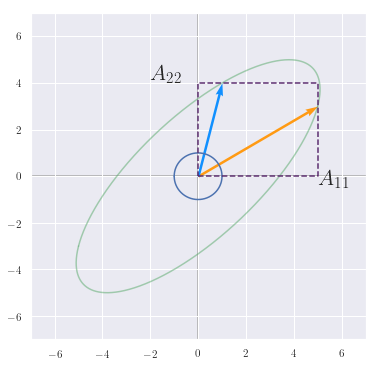

In [5]:
print('Unit circle transformed by A:')
plt.figure(figsize=(6, 6))

matrixToPlot(A)

plt.plot([0, 5, 5, 0, 0], [0, 0, 4, 4, 0], linestyle='--', color='#5B2C6F')
plt.text(5, -0.5, r"$A_{11}$")
plt.text(-2, 4, r"$A_{22}$")

plt.xlim(-7, 7)
plt.ylim(-7, 7)
# plt.axis('scaled')
plt.show()

# \begin{equation}
\tag{12}
\operatorname{Tr}(\mathbf{A})=\sum_{i} \lambda_{i}, \quad \lambda_{i}=\operatorname{eig}(\mathbf{A})
\end{equation}

## Explanation

If eigendecomposition of matrix $\mathbf{A}$ is $\mathbf{A}=\mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^{-1}$, then according to equation (16):
\begin{align}
\operatorname{Tr}(\mathbf{A})&=\operatorname{Tr}(\mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^{-1}) \\
&=\operatorname{Tr}(\mathbf{\Lambda} \mathbf{Q}^{-1} \mathbf{Q}) \\
&=\operatorname{Tr}(\mathbf{\Lambda}) \\
&=\sum_{i} \lambda_{i}
\end{align}

## Visualizing matrix trace by tranforming eigen vectors

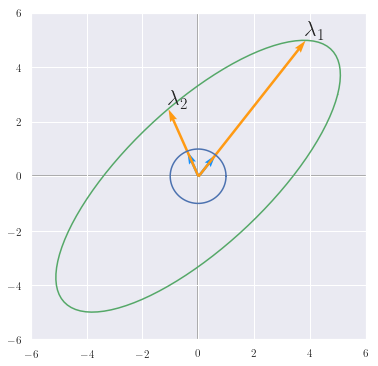

In [6]:
plt.figure(figsize=(6, 6))

linearTransformation(A)

eigVecs = np.linalg.eig(A)[1]
eigVals = np.linalg.eig(A)[0]
plt.text(*eigVecs[:, 0]*eigVals[0], r"$\lambda_1$")
plt.text(*eigVecs[:, 1]*eigVals[1], r"$\lambda_2$")

plt.xlim(-6, 6)
plt.ylim(-6, 6)
# plt.axis('scaled')
plt.show()